# Proyek Akhir: MLOps - Telco Customer Churn Prediction
- **Nama:** Muhammad Naufal Aqil
- **Email:** [Email Dicoding Kamu]
- **Dataset:** Telco Customer Churn (IBM)

Notebook ini berfokus pada tahap **Eksperimen Data** yang mencakup:
1. Data Loading (Reproducible via GDrive)
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing (Cleaning, Encoding, Splitting)

# 1. Perkenalan Dataset



Dataset yang digunakan adalah **Telco Customer Churn** yang diperoleh dari Kaggle. Dataset ini berisi informasi tentang pelanggan perusahaan telekomunikasi fiktif yang mencakup layanan yang mereka gunakan, informasi akun, demografi, dan status churn (apakah mereka berhenti berlangganan atau tidak).

**Tujuan Bisnis:**
Membangun sistem Machine Learning otomatis untuk memprediksi pelanggan yang berpotensi *Churn* (pindah ke kompetitor) agar tim bisnis dapat melakukan tindakan retensi yang tepat sasaran.

**Atribut Kunci:**
* `Churn`: Target variabel (Yes/No).
* `Tenure`: Lama berlangganan (bulan).
* `MonthlyCharges`: Biaya bulanan.
* `PaymentMethod`, `Contract`: Informasi akun.

# 2. Import Library

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# Setup visualisasi
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

print("Library berhasil diimport!")

Library berhasil diimport!


# 3. Memuat Dataset

In [3]:
file_id = '1THQQqK-0iZ9rLsSzbktliPy7FhUtyRH-'
output_filename = 'data_telco.zip'

# Cek apakah file sudah ada
if not os.path.exists(output_filename):
    print("Mendownload dataset dari Google Drive...")
    # Menggunakan gdown untuk download file dari GDrive public link
    !gdown --id {file_id} -O {output_filename}

    # Ekstrak file ZIP
    print("Mengekstrak dataset...")
    with zipfile.ZipFile(output_filename, 'r') as zip_ref:
        zip_ref.extractall('.')
    print("Dataset berhasil didownload dan diekstrak!")
else:
    print("File dataset sudah ada. Melewati proses download.")

# Load CSV ke Pandas DataFrame
csv_filename = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

try:
    df = pd.read_csv(csv_filename)
    print(f"\nBerhasil membaca dataset: {csv_filename}")
    print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")
except FileNotFoundError:
    print(f"Error: File {csv_filename} tidak ditemukan. Cek nama file hasil ekstrak!")

# Tampilkan 5 baris pertama
df.head()

Mendownload dataset dari Google Drive...
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1THQQqK-0iZ9rLsSzbktliPy7FhUtyRH-
To: /content/data_telco.zip
100% 176k/176k [00:00<00:00, 66.9MB/s]
Mengekstrak dataset...
Dataset berhasil didownload dan diekstrak!

Berhasil membaca dataset: WA_Fn-UseC_-Telco-Customer-Churn.csv
Jumlah Baris: 7043, Jumlah Kolom: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4. Exploratory Data Analysis (EDA) - Cek Tipe Data

In [4]:
print("Info Dataset Awal:")
df.info()

print("\nCek Missing Values:")
print(df.isnull().sum())

# Cek khusus kolom TotalCharges yang sering bermasalah (ada string kosong ' ')
print("\nApakah ada string kosong di TotalCharges?", (df['TotalCharges'] == ' ').sum())

Info Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

# 5. Data Preprocessing - Cleaning

In [5]:
# Mengubah TotalCharges menjadi numerik, error (spasi) akan jadi NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Cek berapa yang NaN
print(f"Jumlah baris error di TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Hapus baris yang NaN (karena jumlahnya sedikit, aman dihapus)
df.dropna(inplace=True)

# Hapus kolom customerID (tidak relevan untuk model)
df.drop(columns=['customerID'], inplace=True)

print("\nInfo Dataset Setelah Cleaning:")
df.info()

Jumlah baris error di TotalCharges: 11

Info Dataset Setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 

/tmp/ipython-input-2201559406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


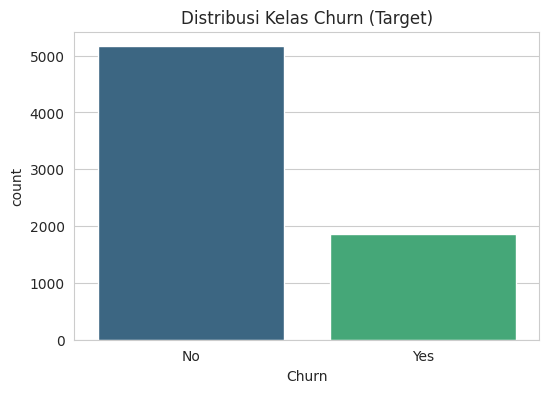

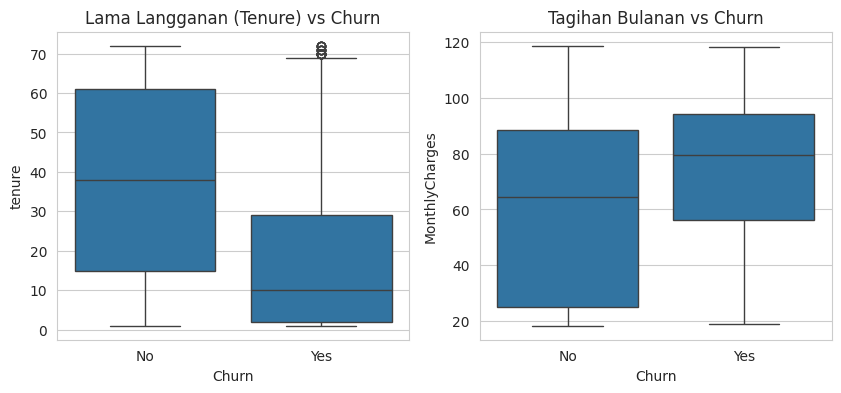

In [6]:
# Visualisasi Target Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Kelas Churn (Target)')
plt.show()

# Melihat korelasi fitur numerik terhadap Churn
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Lama Langganan (Tenure) vs Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Tagihan Bulanan vs Churn')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding Target (Churn: Yes->1, No->0)
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

# One-Hot Encoding untuk fitur kategorikal lainnya
# drop_first=True untuk menghindari multicollinearity (Dummy Variable Trap)
df_clean = pd.get_dummies(df, drop_first=True)

print("Dimensi data setelah Encoding:", df_clean.shape)

# Pisahkan Fitur (X) dan Target (y)
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah Data Train: {X_train.shape[0]}")
print(f"Jumlah Data Test: {X_test.shape[0]}")

Dimensi data setelah Encoding: (7032, 31)
Jumlah Data Train: 5625
Jumlah Data Test: 1407


In [ ]:
# Scaling Fitur Numerik
scaler = StandardScaler()

# Fit hanya pada training data agar tidak bocor (data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mengembalikan ke bentuk DataFrame
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Data berhasil dipreprocessing dan discaling!")
X_train_final.head()

Data berhasil dipreprocessing dan discaling!


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439319,1.321816,0.981556,1.659900,0.996274,1.028312,1.529143,0.327542,-0.327542,1.165543,1.124902,-0.522962,-0.522962,1.576430,-0.522962,1.361573,-0.522962,1.376052,-0.522962,1.546817,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
1,-0.439319,-0.267410,-0.971546,-0.562252,0.996274,-0.972468,-0.653961,-3.053048,3.053048,-0.857969,-0.888966,-0.522962,-0.522962,-0.634345,-0.522962,-0.734445,-0.522962,1.376052,-0.522962,1.546817,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
2,-0.439319,1.444064,0.837066,1.756104,-1.003740,1.028312,-0.653961,0.327542,-0.327542,1.165543,1.124902,-0.522962,-0.522962,-0.634345,-0.522962,1.361573,-0.522962,1.376052,-0.522962,1.546817,-0.522962,-0.797873,-0.522962,-0.799964,-0.515787,1.772603,-1.21303,1.905159,-0.716177,-0.539468
3,-0.439319,-1.204646,0.641092,-0.908326,0.996274,-0.972468,-0.653961,0.327542,-0.327542,-0.857969,1.124902,-0.522962,-0.522962,-0.634345,-0.522962,1.361573,-0.522962,-0.726717,-0.522962,-0.646489,-0.522962,-0.797873,-0.522962,1.250057,-0.515787,-0.564142,-1.21303,-0.524891,1.396302,-0.539468
4,-0.439319,0.669826,-0.808787,-0.101561,-1.003740,1.028312,-0.653961,-3.053048,3.053048,-0.857969,-0.888966,-0.522962,-0.522962,1.576430,-0.522962,-0.734445,-0.522962,-0.726717,-0.522962,-0.646489,-0.522962,1.253332,-0.522962,-0.799964,-0.515787,-0.564142,-1.21303,-0.524891,-0.716177,-0.539468


In [10]:
# --- EXPORT DATA HASIL PREPROCESSING ---

y_train_final = pd.DataFrame(y_train, columns=['Churn'])
y_test_final = pd.DataFrame(y_test, columns=['Churn'])

# Simpan semua ke CSV
X_train_final.to_csv('train_clean.csv', index=False)
X_test_final.to_csv('test_clean.csv', index=False)
y_train_final.to_csv('train_target.csv', index=False)
y_test_final.to_csv('test_target.csv', index=False)

print("✅ Data preprocessing berhasil diexport ke CSV!")

✅ Data preprocessing berhasil diexport ke CSV!
